## Final Project Submission

Please fill out:
* Student name: Jane Mwangi 
                Yvonne Kamari
                Wilfred kivinda
                Eric Njeru
* Student pace:  part time 
* Scheduled project review date/time: 
* Instructor name: MaryAnn Mwikali
* Blog post URL:


# TITLE....

## Project Overview

This project is geared towards providing guidance to homeowners and real estate firms on factors that influence house prices in King County. King County House Sales dataset will be analyzed with an aim of enlighting the home owners on necessary knowledge to make informed decisions on the pricings of houses.

## Business Problem/Objective

Homeowners need to understand factors impacting house prices in order to maximize on the values of their houses. 

## Install & Import the Required Libraries

In [1]:
# Import the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from statsmodels.formula.api import ols
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
import warnings
warnings.filterwarnings('ignore')

## Reading the Data Into a Data Frame

In [2]:
df = pd.read_csv("data/kc_house_data.csv")

### Column Descriptions

* `id` - Unique identifier for a house
* `date` - Date house was sold
* `price` - Sale price (prediction target)
* `bedrooms` - Number of bedrooms
* `bathrooms` - Number of bathrooms
* `sqft_living` - Square footage of living space in the home
* `sqft_lot` - Square footage of the lot
* `floors` - Number of floors (levels) in house
* `waterfront` - Whether the house is on a waterfront
* `view` - Quality of view from house
* `condition` - How good the overall condition of the house is. Related to maintenance of house.
* `grade` - Overall grade of the house. Related to the construction and design of the house.
* `sqft_above` - Square footage of house apart from basement
* `sqft_basement` - Square footage of the basement
* `yr_built` - Year when house was built
* `yr_renovated` - Year when house was renovated
* `zipcode` - ZIP Code used by the United States Postal Service
* `lat` - Latitude coordinate
* `long` - Longitude coordinate
* `sqft_living15` - The square footage of interior housing living space for the nearest 15 neighbors
* `sqft_lot15` - The square footage of the land lots of the nearest 15 neighbors

## Data Cleaning and Preparation

In [3]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,NONE,...,7 Average,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,NO,NONE,...,7 Average,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,NO,NONE,...,6 Low Average,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,NO,NONE,...,7 Average,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,NO,NONE,...,8 Good,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


In [4]:
df.tail()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
21592,263000018,5/21/2014,360000.0,3,2.50,1530,1131,3.0,NO,NONE,...,8 Good,1530,0.0,2009,0.0,98103,47.6993,-122.346,1530,1509
21593,6600060120,2/23/2015,400000.0,4,2.50,2310,5813,2.0,NO,NONE,...,8 Good,2310,0.0,2014,0.0,98146,47.5107,-122.362,1830,7200
21594,1523300141,6/23/2014,402101.0,2,0.75,1020,1350,2.0,NO,NONE,...,7 Average,1020,0.0,2009,0.0,98144,47.5944,-122.299,1020,2007
21595,291310100,1/16/2015,400000.0,3,2.50,1600,2388,2.0,NaN,NONE,...,8 Good,1600,0.0,2004,0.0,98027,47.5345,-122.069,1410,1287
21596,1523300157,10/15/2014,325000.0,2,0.75,1020,1076,2.0,NO,NONE,...,7 Average,1020,0.0,2008,0.0,98144,47.5941,-122.299,1020,1357


In [5]:
# Find the shape of our dataset
df.shape

print("Number of Rows:", df.shape[0])
print("Number of Columns:", df.shape[1])

Number of Rows: 21597
Number of Columns: 21


In [6]:
# Display summary information about the dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     19221 non-null  object 
 9   view           21534 non-null  object 
 10  condition      21597 non-null  object 
 11  grade          21597 non-null  object 
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  object 
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   17755 non-null  float64
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

Our data has 6 variables as objects i.e Date, waterfront,view, condition, grade,sqft_basement

### Dealing with the Missing Values

In [7]:
# Find the percentage of missing values in each column
percantage_msng_values = df.isnull().sum()* 100 / len (df)

print(percantage_msng_values.round(2))

id                0.00
date              0.00
price             0.00
bedrooms          0.00
bathrooms         0.00
sqft_living       0.00
sqft_lot          0.00
floors            0.00
waterfront       11.00
view              0.29
condition         0.00
grade             0.00
sqft_above        0.00
sqft_basement     0.00
yr_built          0.00
yr_renovated     17.79
zipcode           0.00
lat               0.00
long              0.00
sqft_living15     0.00
sqft_lot15        0.00
dtype: float64


In [8]:
# Finding unique values in the "waterfront" column
unique_values_wf = df['waterfront'].unique()

print(unique_values_wf)


[nan 'NO' 'YES']


In [9]:
# Find the total number of houses where 'waterfront' is 'yes'
total_waterfront_yes = len(df[df['waterfront'] == 'YES'])

# Print the total number
print("Total number of houses where 'waterfront' is 'YES':", total_waterfront_yes)

Total number of houses where 'waterfront' is 'YES': 146


In [10]:
# Replace null values in 'waterfront' with 'NO'
df['waterfront'].fillna('NO', inplace=True)

In [11]:
# Find unique values in the view column
unique_values_view = df['view'].unique()

print(unique_values_view)



['NONE' nan 'GOOD' 'EXCELLENT' 'AVERAGE' 'FAIR']


In [12]:
# Find out how many houses have null values under the 'view' column
null_values_view = df['view'].isnull().sum()

# Print the total number
print("Total number of houses with null values under the 'view' column:", null_values_view)


Total number of houses with null values under the 'view' column: 63


In [13]:
#find out how many
total_view_none = len(df[df['view'] == 'NONE'])

# Print the total number
print("Total number of houses where 'view' is 'NONE':", total_view_none)

Total number of houses where 'view' is 'NONE': 19422


In [14]:
# Replace NaN values in the 'view' column with 'NONE'
df['view'].fillna('NONE', inplace=True)


In [15]:
# Finding unique values in the the yr_renovated column
unique_values_renovation = df['yr_renovated'].unique()
unique_values_renovation.sort()
print(unique_values_renovation)


[   0. 1934. 1940. 1944. 1945. 1946. 1948. 1950. 1951. 1953. 1954. 1955.
 1956. 1957. 1958. 1959. 1960. 1962. 1963. 1964. 1965. 1967. 1968. 1969.
 1970. 1971. 1972. 1973. 1974. 1975. 1976. 1977. 1978. 1979. 1980. 1981.
 1982. 1983. 1984. 1985. 1986. 1987. 1988. 1989. 1990. 1991. 1992. 1993.
 1994. 1995. 1996. 1997. 1998. 1999. 2000. 2001. 2002. 2003. 2004. 2005.
 2006. 2007. 2008. 2009. 2010. 2011. 2012. 2013. 2014. 2015.   nan]


In [16]:
# Find the number of houses with 'yr_renovated' greater than 0
houses_with_renovations = df[df['yr_renovated'] > 0]

# Print the number of houses with 'yr_renovated' greater than 0
print("\nNumber of houses with 'yr_renovated' greater than 0:", len(houses_with_renovations))


Number of houses with 'yr_renovated' greater than 0: 744


In [17]:
# Replace null values in 'yr_renovated' with 0
df['yr_renovated'].fillna(0, inplace=True)

In [18]:
# Investigating the condition column
unique_values_condition = df['condition'].unique()

print(unique_values_condition)


['Average' 'Very Good' 'Good' 'Poor' 'Fair']


In [19]:
# Investigating the grade column
unique_values_grade = df['grade'].unique()

# Sorting the unique values in ascending order
unique_values_grade.sort()

print(unique_values_grade)


['10 Very Good' '11 Excellent' '12 Luxury' '13 Mansion' '3 Poor' '4 Low'
 '5 Fair' '6 Low Average' '7 Average' '8 Good' '9 Better']


In [20]:
missing_values_percent = df.isnull().sum() * 100 / len(df)

print(missing_values_percent)

id               0.0
date             0.0
price            0.0
bedrooms         0.0
bathrooms        0.0
sqft_living      0.0
sqft_lot         0.0
floors           0.0
waterfront       0.0
view             0.0
condition        0.0
grade            0.0
sqft_above       0.0
sqft_basement    0.0
yr_built         0.0
yr_renovated     0.0
zipcode          0.0
lat              0.0
long             0.0
sqft_living15    0.0
sqft_lot15       0.0
dtype: float64


We have cleaned our data and no longer have missing values.

### Converting the Data Types

In [21]:
# Convert the 'date' column to datetime format
df['date'] = pd.to_datetime(df['date'], format='%m/%d/%Y')

In [22]:
# Investigate the 'sqft_basement' column
df['sqft_basement'].head(8)

0       0.0
1     400.0
2       0.0
3     910.0
4       0.0
5    1530.0
6         ?
7       0.0
Name: sqft_basement, dtype: object

In [23]:
# Count number of '?' in 'sqft_basement' column
count_question_marks = df['sqft_basement'].str.count('\?').sum()

# Calculate the percentage of '?' in 'sqft_basement' column
percentage_question_marks = (count_question_marks / len(df['sqft_basement'])) * 100

print("Number of '?' in 'sqft_basement' column:", count_question_marks)
print("Percentage of '?' in 'sqft_basement' column:", percentage_question_marks.round(2))



Number of '?' in 'sqft_basement' column: 454
Percentage of '?' in 'sqft_basement' column: 2.1


In [24]:
# Drop rows with '?' in the 'sqft_basement' column
df = df[df['sqft_basement'] != '?']

# Convert the 'sqft_basement' column to float
df['sqft_basement'] = df['sqft_basement'].astype(float)


In [25]:
# Convert the 'year_renovated' column to integers
df['yr_renovated'] = df['yr_renovated'].astype(int)


In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21143 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   id             21143 non-null  int64         
 1   date           21143 non-null  datetime64[ns]
 2   price          21143 non-null  float64       
 3   bedrooms       21143 non-null  int64         
 4   bathrooms      21143 non-null  float64       
 5   sqft_living    21143 non-null  int64         
 6   sqft_lot       21143 non-null  int64         
 7   floors         21143 non-null  float64       
 8   waterfront     21143 non-null  object        
 9   view           21143 non-null  object        
 10  condition      21143 non-null  object        
 11  grade          21143 non-null  object        
 12  sqft_above     21143 non-null  int64         
 13  sqft_basement  21143 non-null  float64       
 14  yr_built       21143 non-null  int64         
 15  yr_renovated   2114

## Derive New Features

In [27]:
# Extract the month from the 'date' column
df['month'] = pd.to_datetime(df['date']).dt.month

In [28]:
# Create a dictionary to map months to seasons
seasons_mapping = {
    1: 1, # 1 represents winter
    2: 1, 
    3: 2, # 2 represents spring
    4: 2,  
    5: 2,  
    6: 3,  # 3 represents summer
    7: 3,  
    8: 3,  
    9: 4,  # 4 represents fall
    10: 4,  
    11: 4,  
    12: 1,  
}

# Map the 'month' column to 'season' 
df['sale_season'] = pd.to_datetime(df['date']).dt.month.map(seasons_mapping)
df['sale_season'].unique() 

array([4, 1, 2, 3], dtype=int64)

## Data Exploration

In [29]:
# df.info()

In [30]:
# df.describe()

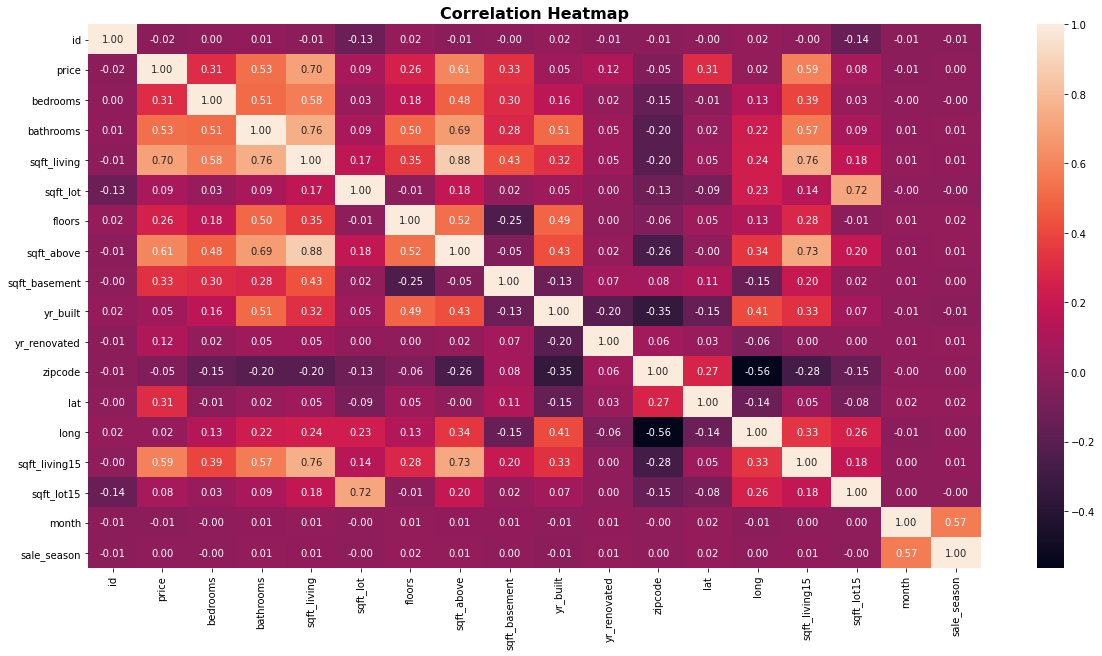

In [31]:
# Plot the correlation between the numeric features
plt.figure(figsize=(20, 10))
sns.heatmap(df.corr(), annot=True, fmt = ".2f")
plt.title("Correlation Heatmap", fontsize=16, fontweight='bold')

plt.show()

In [32]:
corr = df.corr()['price'].sort_values(ascending = False)
corr

price            1.000000
sqft_living      0.702328
sqft_above       0.605143
sqft_living15    0.586415
bathrooms        0.525889
sqft_basement    0.325008
bedrooms         0.309204
lat              0.306507
floors           0.256355
yr_renovated     0.116719
sqft_lot         0.087937
sqft_lot15       0.083192
yr_built         0.054459
long             0.022101
sale_season      0.002949
month           -0.010234
id              -0.015796
zipcode         -0.053166
Name: price, dtype: float64

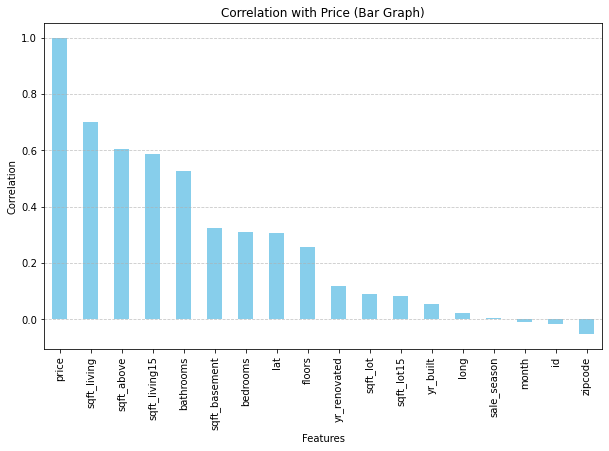

In [33]:
corr = df.corr()['price'].sort_values(ascending=False)

# Create a bar graph for the correlation values
plt.figure(figsize=(10, 6))
corr.plot(kind='bar', color='skyblue')
plt.title('Correlation with Price (Bar Graph)')
plt.xlabel('Features')
plt.ylabel('Correlation')
plt.xticks(rotation=90)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


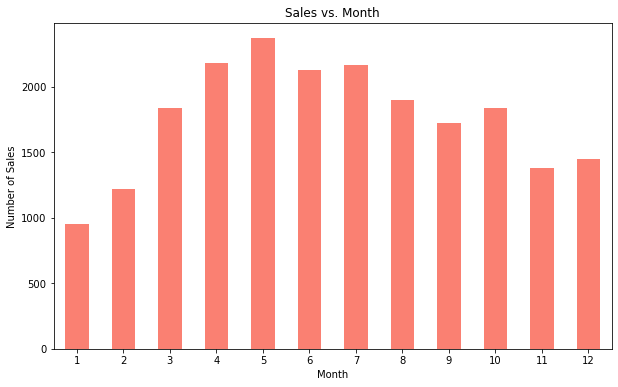

In [34]:
month_counts = df['month'].value_counts().sort_index()
plt.figure(figsize=(10, 6))
month_counts.plot(kind='bar', color='salmon')
plt.title('Sales vs. Month')
plt.xlabel('Month')
plt.ylabel('Number of Sales')
plt.xticks(rotation=0)  # Rotate x-axis labels if needed
plt.show()

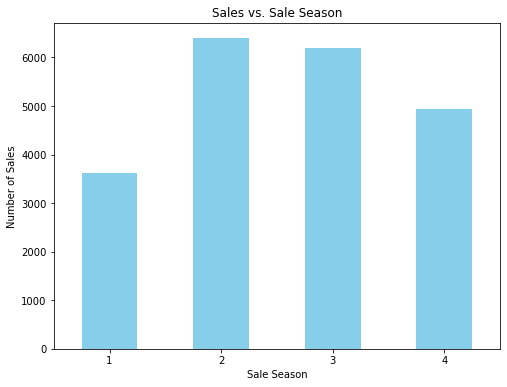

In [35]:
season_counts = df['sale_season'].value_counts().sort_index()
plt.figure(figsize=(8, 6))
season_counts.plot(kind='bar', color='skyblue')
plt.title('Sales vs. Sale Season')
plt.xlabel('Sale Season')
plt.ylabel('Number of Sales')
plt.xticks(rotation=0)  # Rotate x-axis labels if needed
plt.show()

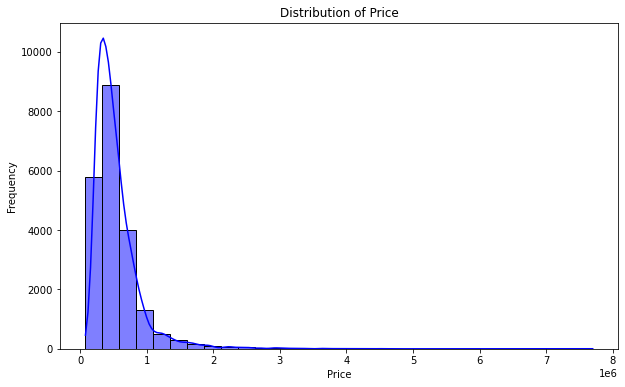

In [36]:
# Plot the distribution of price
plt.figure(figsize=(10, 6))
sns.histplot(df['price'], bins=30, kde=True, color='blue')
plt.title('Distribution of Price')
plt.xlabel('Price')
plt.ylabel('Frequency')

plt.show()

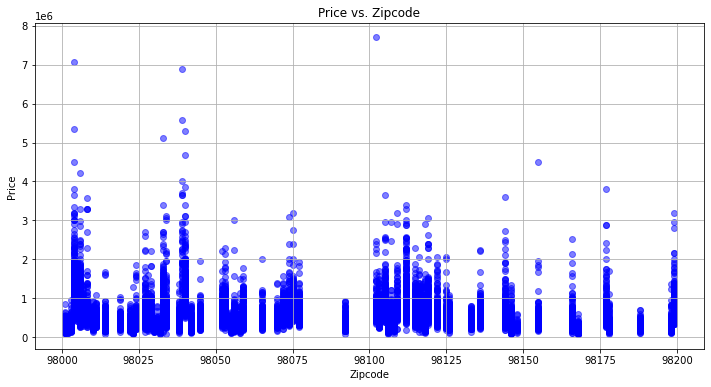

In [37]:
plt.figure(figsize=(12, 6))
plt.scatter(df['zipcode'], df['price'], alpha=0.5, color='b')
plt.title('Price vs. Zipcode')
plt.xlabel('Zipcode')
plt.ylabel('Price')
plt.grid(True)
plt.show()

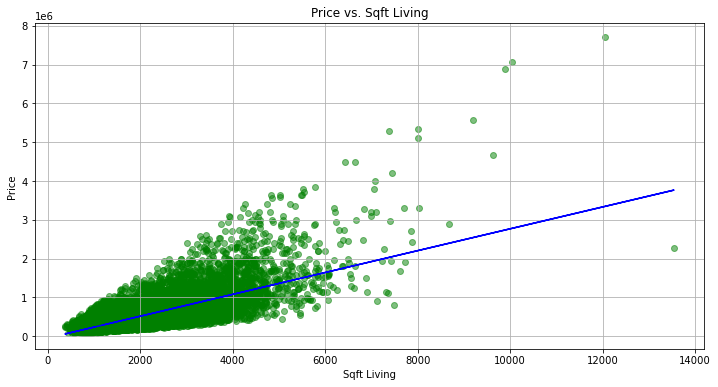

In [38]:
plt.figure(figsize=(12, 6))
plt.scatter(df['sqft_living'], df['price'], alpha=0.5, color='g')
plt.title('Price vs. Sqft Living')
plt.xlabel('Sqft Living')
plt.ylabel('Price')
plt.grid(True)


slope, intercept = np.polyfit(df['sqft_living'], df['price'], 1)
plt.plot(df['sqft_living'], slope * df['sqft_living'] + intercept, color='b')


plt.show()

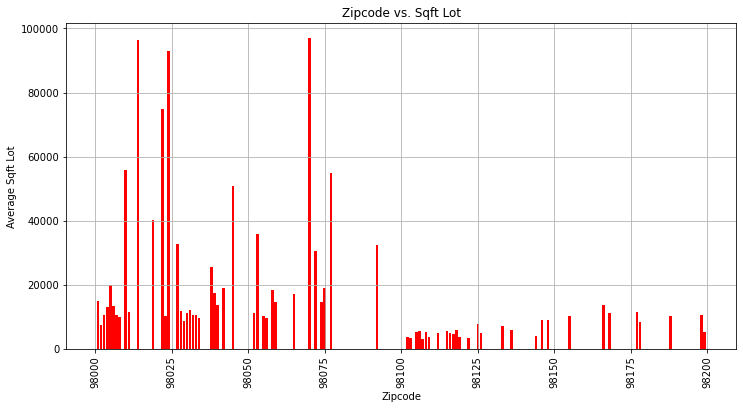

In [39]:
zipcode_sqft_lot = df.groupby('zipcode')['sqft_lot'].mean().reset_index()
plt.figure(figsize=(12, 6))
plt.bar(zipcode_sqft_lot['zipcode'], zipcode_sqft_lot['sqft_lot'], color='r')
plt.title('Zipcode vs. Sqft Lot')
plt.xlabel('Zipcode')
plt.ylabel('Average Sqft Lot')
plt.xticks(rotation=90)
plt.grid(True)
plt.show()

# pending tasks

try look to codes that map zipcodes
dealing with bedroom outlies
dealing with the year renovated columns
codes for comparing price with all categorical vars
simple linear regression

### Detect ouliers

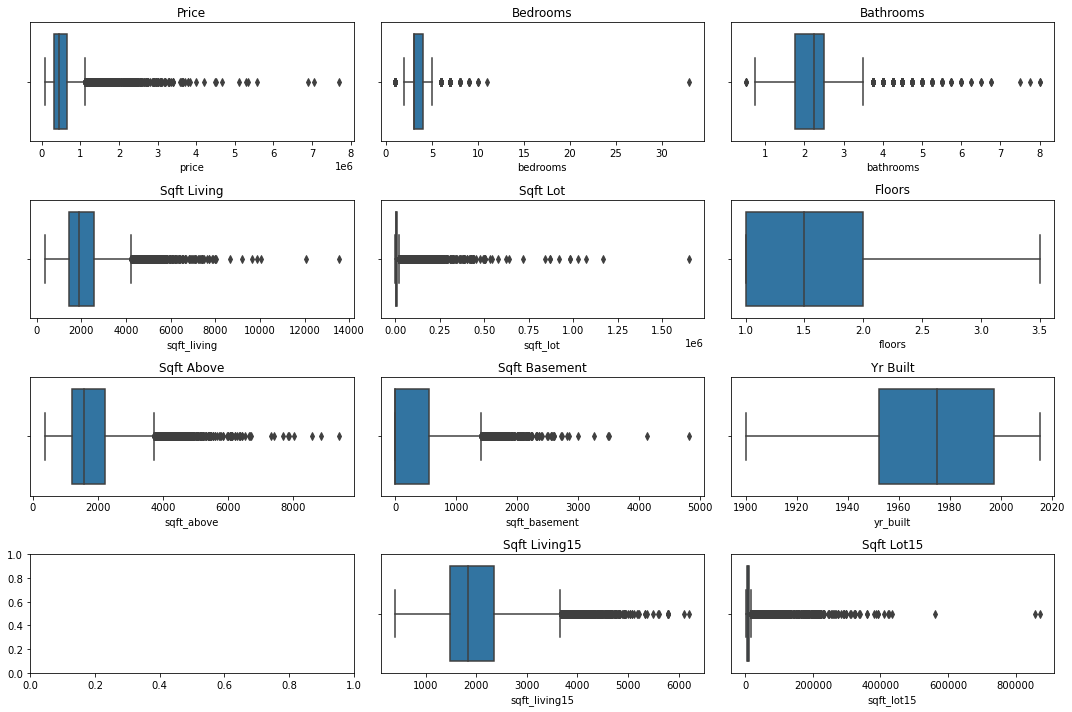

In [40]:
def detectoutliers():
    fig, axs = plt.subplots(4, 3, figsize=(15, 10))
    
    sns.boxplot(df['price'], ax=axs[0, 0])
    axs[0, 0].set_title('Price')
    sns.boxplot(df['bedrooms'], ax=axs[0, 1])
    axs[0, 1].set_title('Bedrooms')
    sns.boxplot(df['bathrooms'], ax=axs[0, 2])
    axs[0, 2].set_title('Bathrooms')
    sns.boxplot(df['sqft_living'], ax=axs[1, 0])
    axs[1, 0].set_title('Sqft Living')
    sns.boxplot(df['sqft_lot'], ax=axs[1, 1])
    axs[1, 1].set_title('Sqft Lot')
    sns.boxplot(df['floors'], ax=axs[1, 2])
    axs[1, 2].set_title('Floors')
    sns.boxplot(df['sqft_above'], ax=axs[2, 0])
    axs[2, 0].set_title('Sqft Above')
    sns.boxplot(df['sqft_basement'], ax=axs[2, 1])
    axs[2, 1].set_title('Sqft Basement')
    sns.boxplot(df['yr_built'], ax=axs[2, 2])
    axs[2, 2].set_title('Yr Built')
#     sns.boxplot(df['yr_renovated'], ax=axs[3, 0])
#     axs[3, 0].set_title('Yr Renovated')
    sns.boxplot(df['sqft_living15'], ax=axs[3, 1])
    axs[3, 1].set_title('Sqft Living15')
    sns.boxplot(df['sqft_lot15'], ax=axs[3, 2])
    axs[3, 2].set_title('Sqft Lot15')
    
    plt.tight_layout()
    plt.show()

# Call the function to detect outliers
detectoutliers()

In [41]:
# Filter 'sqft_lot' and 'price' for houses with 8 or more bedrooms
df[df['bedrooms'] >= 8][['bedrooms', 'bathrooms', 'price', 'sqft_lot', 'sqft_above']].sort_values(by='bedrooms', ascending=False)

,bedrooms,bathrooms,price,sqft_lot,sqft_above
15856,33,1.75,640000.0,6000,1040
8748,11,3.00,520000.0,4960,2400
15147,10,2.00,650000.0,11914,3010
19239,10,3.00,660000.0,3745,1860
13301,10,5.25,1150000.0,10920,2500
4092,9,4.50,599999.0,6988,2450
4231,9,3.00,700000.0,4400,2830
6073,9,4.50,1280000.0,5000,2530
8537,9,7.50,450000.0,6504,4050
18428,9,3.00,934000.0,4480,1880


In [42]:
houses_above_6_bedrooms = len(df[df['bedrooms'] >6])
houses_above_6_bedrooms

60

In [43]:
df = df[df['bedrooms'] <= 6]
df

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,month,sale_season
0,7129300520,2014-10-13,221900.0,3,1.00,1180,5650,1.0,NO,NONE,...,0.0,1955,0,98178,47.5112,-122.257,1340,5650,10,4
1,6414100192,2014-12-09,538000.0,3,2.25,2570,7242,2.0,NO,NONE,...,400.0,1951,1991,98125,47.7210,-122.319,1690,7639,12,1
2,5631500400,2015-02-25,180000.0,2,1.00,770,10000,1.0,NO,NONE,...,0.0,1933,0,98028,47.7379,-122.233,2720,8062,2,1
3,2487200875,2014-12-09,604000.0,4,3.00,1960,5000,1.0,NO,NONE,...,910.0,1965,0,98136,47.5208,-122.393,1360,5000,12,1
4,1954400510,2015-02-18,510000.0,3,2.00,1680,8080,1.0,NO,NONE,...,0.0,1987,0,98074,47.6168,-122.045,1800,7503,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,263000018,2014-05-21,360000.0,3,2.50,1530,1131,3.0,NO,NONE,...,0.0,2009,0,98103,47.6993,-122.346,1530,1509,5,2
21593,6600060120,2015-02-23,400000.0,4,2.50,2310,5813,2.0,NO,NONE,...,0.0,2014,0,98146,47.5107,-122.362,1830,7200,2,1
21594,1523300141,2014-06-23,402101.0,2,0.75,1020,1350,2.0,NO,NONE,...,0.0,2009,0,98144,47.5944,-122.299,1020,2007,6,3
21595,291310100,2015-01-16,400000.0,3,2.50,1600,2388,2.0,NO,NONE,...,0.0,2004,0,98027,47.5345,-122.069,1410,1287,1,1


In [44]:
houses_above_6_bedrooms = len(df[df['bedrooms'] >6])
houses_above_6_bedrooms

0